## **IT JOBS BY 2030** ##




In [18]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# loading the dataset
df = pd.read_csv('/content/sample_data/it_jobs.csv')

In [20]:
df.columns

Index(['Domain', 'Job Title', 'Projected Growth by 2030'], dtype='object')

In [21]:
df.dtypes

,0
Domain,object
Job Title,object
Projected Growth by 2030,object


In [22]:
df.shape

(13606025, 3)

In [23]:
df.head()

,Domain,Job Title,Projected Growth by 2030
0,Augmented Reality (AR),Engineer,77%
1,5G Networks,Developer,70%
2,Cybersecurity,Engineer,36%
3,Internet of Things (IoT),Consultant,138%
4,Cybersecurity,Analyst,86%


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13606025 entries, 0 to 13606024
Data columns (total 3 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   Domain                    object
 1   Job Title                 object
 2   Projected Growth by 2030  object
dtypes: object(3)
memory usage: 311.4+ MB


In [25]:
df.describe()

,Domain,Job Title,Projected Growth by 2030
count,13606025,13606025,13606025
unique,13,6,72
top,Artificial Intelligence,Architect,77%
freq,1047730,2269578,543372


In [26]:
#Data Preprocessing
rename = {'Domain':'domain',
          'Job Title':'job_title',
          'Projected Growth by 2030':'growth_by_2030'}
df.rename(columns = rename,inplace=True)

In [27]:
df['growth_by_2030']=df.growth_by_2030.str.replace(r'%',"",regex =True)
df['growth_by_2030'] = pd.to_numeric(df['growth_by_2030'], errors='coerce')
# Fill NaN values with 0 and then convert to integers
df['growth_by_2030'] = df['growth_by_2030'].fillna(0).astype(int)

In [28]:
df.head()

,domain,job_title,growth_by_2030
0,Augmented Reality (AR),Engineer,77
1,5G Networks,Developer,70
2,Cybersecurity,Engineer,36
3,Internet of Things (IoT),Consultant,138
4,Cybersecurity,Analyst,86


In [29]:

# checking null values
df.isna().sum()

,0
domain,0
job_title,0
growth_by_2030,0


In [30]:
df.domain.value_counts()

,count
domain,
Artificial Intelligence,1047730
Quantum Computing,1047452
5G Networks,1047402
Blockchain,1047138
Augmented Reality (AR),1046899
Data Analytics,1046803
Edge Computing,1046741
Virtual Reality (VR),1046363
Cybersecurity,1046237


In [31]:
df.head()

,domain,job_title,growth_by_2030
0,Augmented Reality (AR),Engineer,77
1,5G Networks,Developer,70
2,Cybersecurity,Engineer,36
3,Internet of Things (IoT),Consultant,138
4,Cybersecurity,Analyst,86


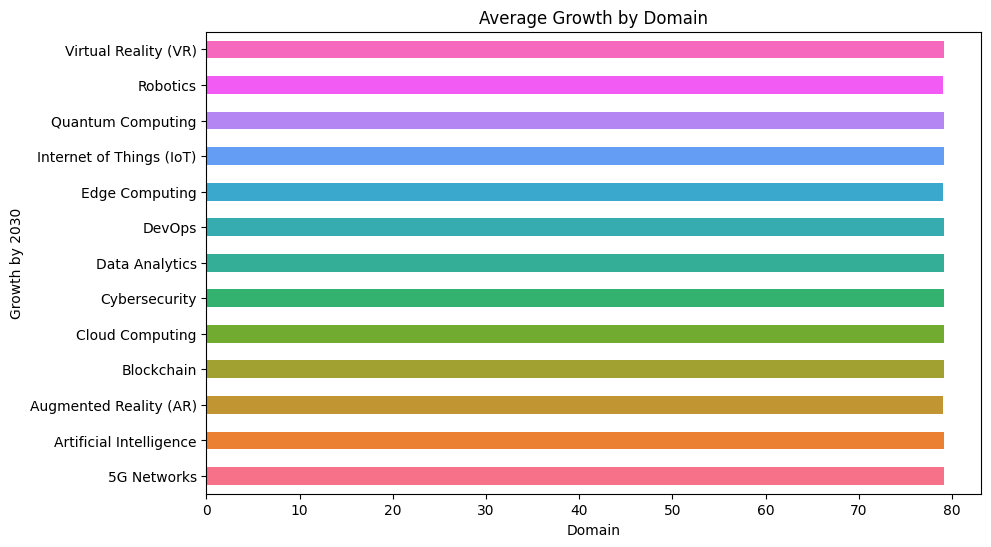

In [32]:
# Average Growth by domain
domain_growth = df.groupby('domain')['growth_by_2030']
result = domain_growth.mean()
plt.figure(figsize=(10,6))
num_bars = len(result)

colors = sns.color_palette("husl", num_bars)
result.plot(
            kind='barh',
            xlabel='Domain',
            ylabel ='Growth by 2030',
            title='Average Growth by Domain',
            color = colors)

plt.show()

<ipython-input-33-d1fa6e5be8fb>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




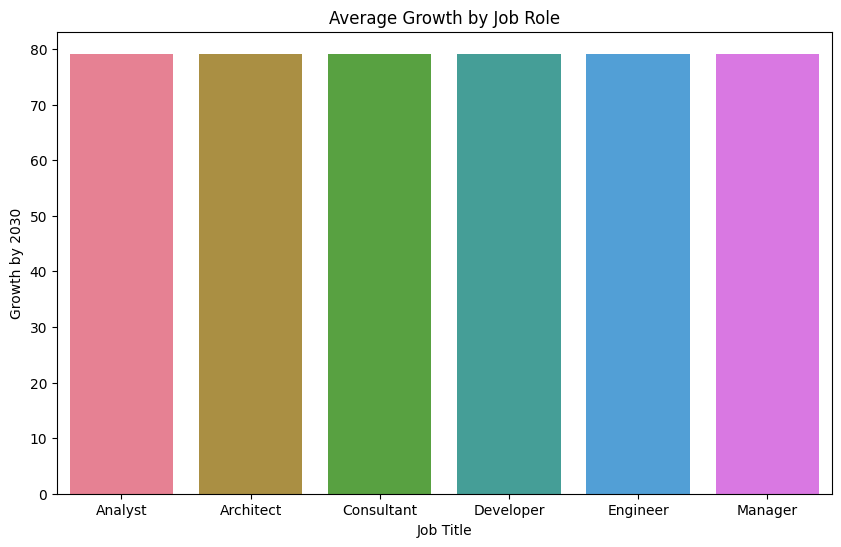

In [33]:
# Average Growth by Job role
job_role = df.groupby('job_title')['growth_by_2030']
result = job_role.mean()
plt.figure(figsize=(10,6))

ax = sns.barplot(x=result.index,
                 y=result.values,
                 palette="husl")

# Added labels and title using matplotlib.pyplot
ax.set_xlabel("Job Title")
ax.set_ylabel("Growth by 2030")
ax.set_title("Average Growth by Job Role")

plt.show()

In [34]:
# printing specific jobs from specific domain
domain_job = df.groupby(['domain', 'job_title'])['job_title'].count().reset_index(name='count')
plt.figure(figsize=(10, 6))
import plotly.express as px

fig = px.treemap(domain_job,
                 path=['domain', 'job_title'],
                 values='count',
                 )
fig.show()

<Figure size 1000x600 with 0 Axes>